In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (update the file path accordingly)
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
excel_data = pd.ExcelFile("C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx")

# Load the data from Sheet1
sheet1_data = excel_data.parse('Sheet1')

# Convert 'Year' to numeric and filter for 2015-2024
sheet1_data['Year'] = pd.to_numeric(sheet1_data['Year'], errors='coerce')
filtered_data = sheet1_data[(sheet1_data['Year'] >= 2015) & (sheet1_data['Year'] <= 2024)]

# Aggregate the number of accidents per year
yearly_accidents = filtered_data.groupby('Year')['IncidenceId'].count()

# If needed, convert the 'Year' to a datetime object
yearly_accidents.index = pd.to_datetime(yearly_accidents.index, format='%Y')

# Display the yearly aggregated data
print(yearly_accidents)


Year
2015-01-01      4
2016-01-01      4
2017-01-01      9
2018-01-01     28
2019-01-01     53
2020-01-01     53
2021-01-01    233
2022-01-01    349
2023-01-01     82
2024-01-01      4
Name: IncidenceId, dtype: int64


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimi

2025-01-01    459.803480
2026-01-01    547.797919
2027-01-01     25.349060
2028-01-01     72.942187
2029-01-01    723.531014
Freq: YS-JAN, Name: predicted_mean, dtype: float64


C:\Users\02ris\AppData\Local\Temp\ipykernel_20464\1258723164.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=yearly_accidents.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', color='orange')


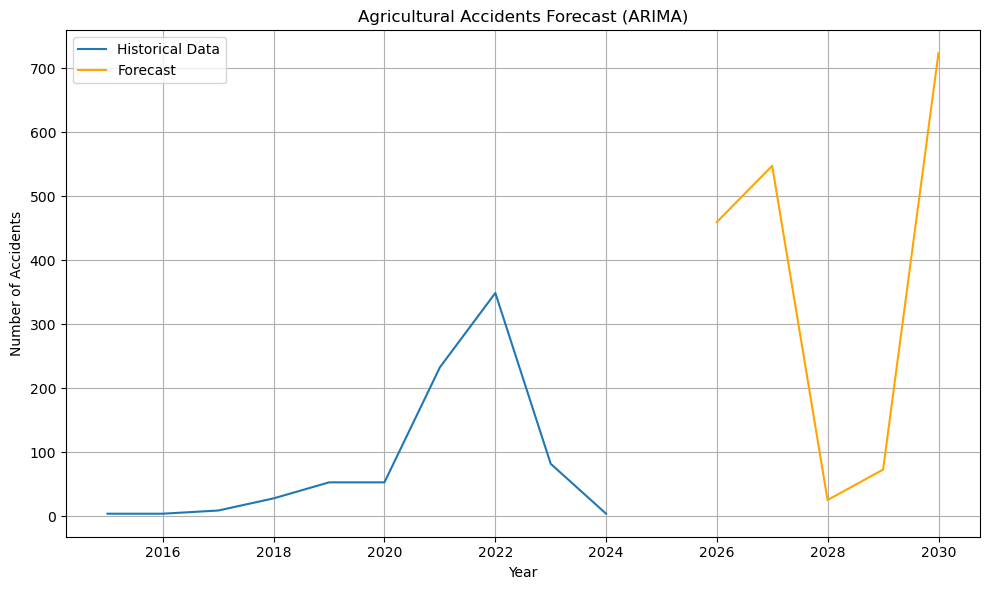

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you've already loaded your yearly accidents data into 'yearly_accidents'
# Example: Load and aggregate the data
# yearly_accidents = filtered_data.groupby('Year')['IncidenceId'].count()

# Fit the ARIMA model (replace the order values with your preferred (p, d, q) order)
model = ARIMA(yearly_accidents, order=(5, 1, 0))  # (p, d, q)
arima_model = model.fit()

# Make predictions for future years (e.g., 5 years ahead)
forecast = arima_model.forecast(steps=5)

# Display the forecasted values
print(forecast)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents, label='Historical Data')
plt.plot(pd.date_range(start=yearly_accidents.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', color='orange')
plt.title('Agricultural Accidents Forecast (ARIMA)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
from pmdarima import auto_arima

# Automatically find the best ARIMA parameters
model = auto_arima(yearly_accidents, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())

# Forecast future values
forecast = model.predict(n_periods=5)
print(forecast)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -60.698
Date:                Thu, 19 Sep 2024   AIC                            125.396
Time:                        18:53:56   BIC                            126.001
Sample:                    01-01-2015   HQIC                           124.732
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6170      0.172      3.595      0.000       0.281       0.953
sigma2      1.044e+04   4799.004      2.176      0.030    1037.194    1.98e+04
Ljung-Box (L1) (Q):                   0.27   Jarque-

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.866, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=125.396, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126.554, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126.245, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.697 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -60.698
Date:                Thu, 19 Sep 2024   AIC                            125.396
Time:                        22:39:24   BIC                 

C:\Users\02ris\AppData\Local\Temp\ipykernel_20464\159748406.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=yearly_accidents.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', color='orange')


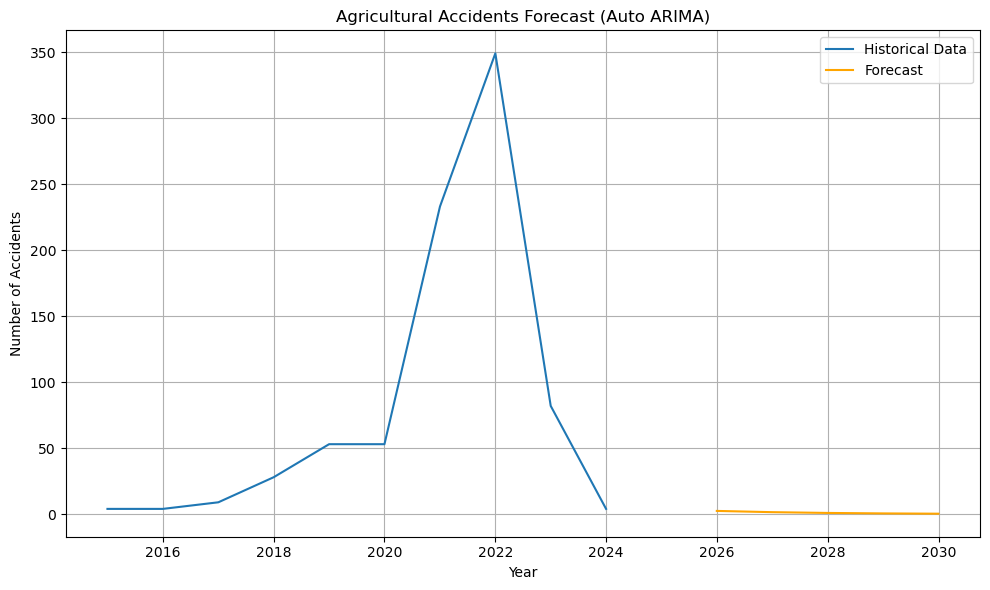

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Assuming you've already loaded your yearly accidents data into 'yearly_accidents'

# Fit auto_arima to find the best (p, d, q) values
auto_model = auto_arima(yearly_accidents, seasonal=False, stepwise=True, trace=True, suppress_warnings=True)

# Print the summary of the model
print(auto_model.summary())

# Make predictions for future years (e.g., 5 years ahead)
forecast = auto_model.predict(n_periods=5)

# Display the forecast
print(forecast)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents, label='Historical Data')
plt.plot(pd.date_range(start=yearly_accidents.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', color='orange')
plt.title('Agricultural Accidents Forecast (Auto ARIMA)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(yearly_accidents)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretation: If the p-value is less than 0.05, the series is stationary.


ADF Statistic: 0.679192
p-value: 0.989413


In [9]:
# Apply first-order differencing if the series is non-stationary
yearly_accidents_diff = yearly_accidents.diff().dropna()

# Check stationarity again
result = adfuller(yearly_accidents_diff)
print('ADF Statistic (differenced): %f' % result[0])
print('p-value (differenced): %f' % result[1])


ADF Statistic (differenced): -4.523825
p-value (differenced): 0.000178


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimi

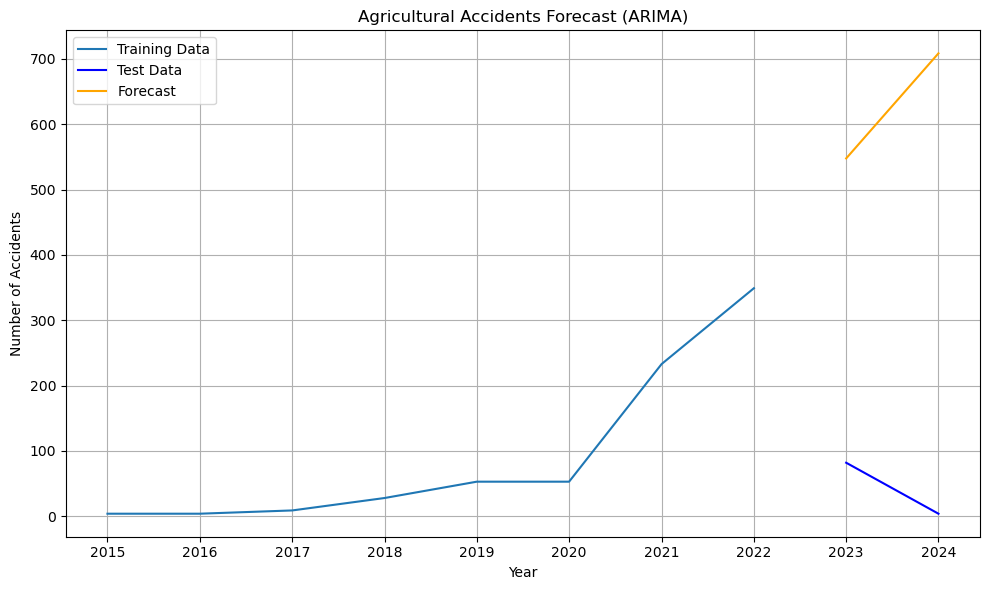

Mean Absolute Error: 584.9988342850309
Mean Squared Error: 356474.14299071295
Root Mean Squared Error: 597.0545561259146


In [10]:
train_size = int(len(yearly_accidents) * 0.8)  # 80% training data
train_data = yearly_accidents[:train_size]
test_data = yearly_accidents[train_size:]

# Fit the ARIMA model on the training data
model = ARIMA(train_data, order=(5, 1, 0))
arima_model = model.fit()

# Forecast for the test period
forecast = arima_model.forecast(steps=len(test_data))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(test_data.index, forecast, label='Forecast', color='orange')
plt.title('Agricultural Accidents Forecast (ARIMA)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimi

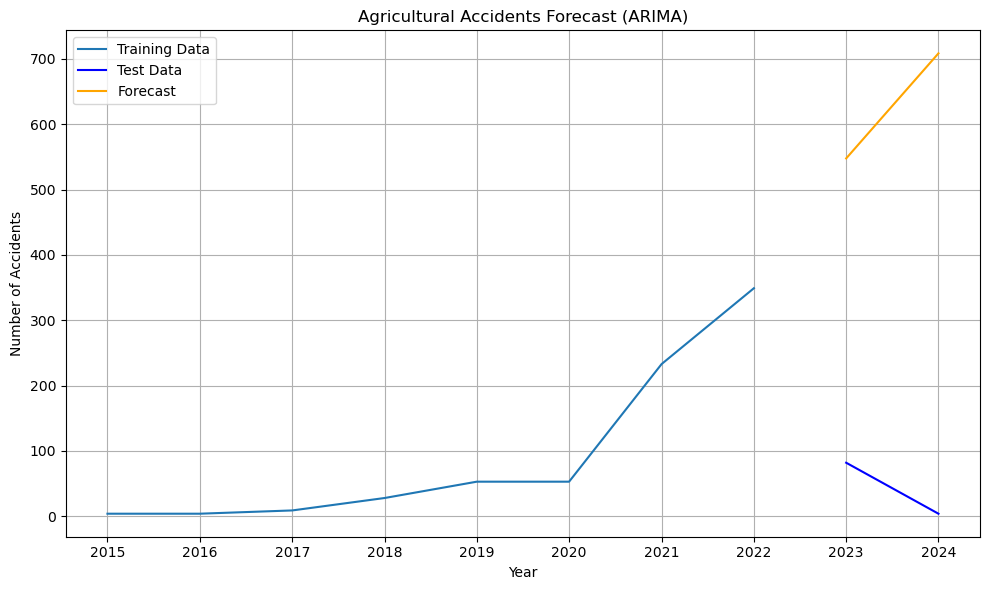

Mean Absolute Error: 584.9988342850309
Mean Squared Error: 356474.14299071295
Root Mean Squared Error: 597.0545561259146


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'yearly_accidents' is your time series data
# Split the data into train and test sets
train_size = int(len(yearly_accidents) * 0.8)  # 80% training data
train_data = yearly_accidents[:train_size]
test_data = yearly_accidents[train_size:]

# Initial manual ARIMA model - you can modify the (p, d, q) values based on your observations
# Let's try with (p, d, q) = (5, 1, 0) as a starting point, then we can adjust based on performance
model = ARIMA(train_data, order=(5, 1, 0))
arima_model = model.fit()

# Forecast for the test period
forecast = arima_model.forecast(steps=len(test_data))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(test_data.index, forecast, label='Forecast', color='orange')
plt.title('Agricultural Accidents Forecast (ARIMA)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the model performance using error metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


In [12]:
# Define a list of (p, d, q) combinations to try
parameters = [(5, 1, 0), (3, 1, 2), (2, 1, 3), (1, 1, 1), (0, 1, 1)]

best_rmse = float('inf')
best_order = None
best_model = None

for param in parameters:
    try:
        # Fit the ARIMA model with the current (p, d, q) combination
        model = ARIMA(train_data, order=param)
        arima_model = model.fit()
        
        # Forecast for the test period
        forecast = arima_model.forecast(steps=len(test_data))
        
        # Calculate RMSE
        rmse = mean_squared_error(test_data, forecast) ** 0.5
        
        print(f'Tried ARIMA{param} - RMSE: {rmse}')
        
        # Keep track of the best model
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = param
            best_model = arima_model
            
    except Exception as e:
        print(f"Error with ARIMA{param}: {e}")
        
print(f'Best ARIMA{best_order} with RMSE: {best_rmse}')


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimi

Tried ARIMA(5, 1, 0) - RMSE: 597.0545561259146


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting para

Tried ARIMA(3, 1, 2) - RMSE: 426.82799152538644
Tried ARIMA(2, 1, 3) - RMSE: 425.0732843095874
Tried ARIMA(1, 1, 1) - RMSE: 420.00093550351585
Tried ARIMA(0, 1, 1) - RMSE: 321.6363871101516
Best ARIMA(0, 1, 1) with RMSE: 321.6363871101516


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

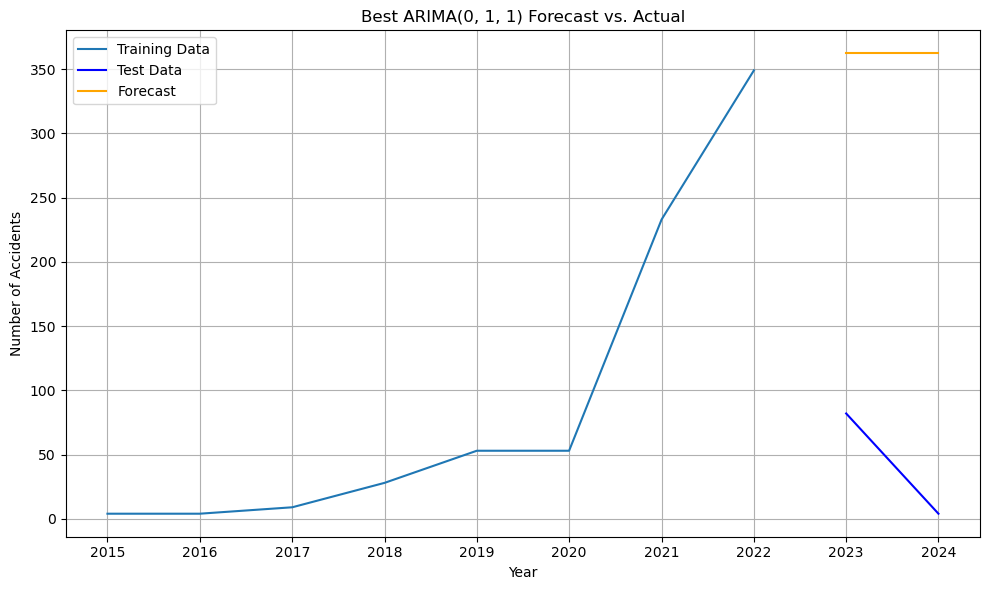

In [13]:
# Use the best model for forecasting
forecast = best_model.forecast(steps=len(test_data))

# Plot the results with the best ARIMA model
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(test_data.index, forecast, label='Forecast', color='orange')
plt.title(f'Best ARIMA{best_order} Forecast vs. Actual')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define a time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Prepare a list to store RMSE values for each fold
cv_rmse = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(yearly_accidents):
    train, test = yearly_accidents[train_index], yearly_accidents[test_index]
    
    # Fit ARIMA model on the current training fold
    model = ARIMA(train, order=(5, 1, 0))  # You can adjust (p, d, q) based on your fine-tuning
    arima_model = model.fit()
    
    # Make predictions
    forecast = arima_model.forecast(steps=len(test))
    
    # Calculate RMSE for this fold
    rmse = mean_squared_error(test, forecast) ** 0.5
    cv_rmse.append(rmse)

# Print the average RMSE across all folds
print(f'Cross-Validation RMSE: {np.mean(cv_rmse)}')


C:\Users\02ris\AppData\Local\Temp\ipykernel_20464\3668062562.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = yearly_accidents[train_index], yearly_accidents[test_index]
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, 

Cross-Validation RMSE: 171.4611844390792


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


final code for more accurate prediction


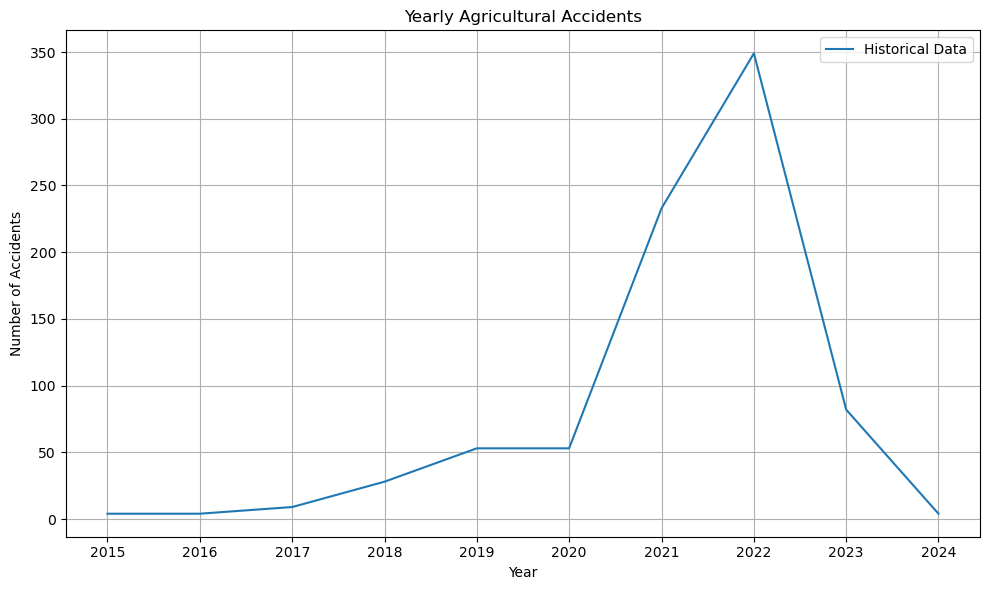

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you've already loaded your yearly accidents data into 'yearly_accidents'
# Example: Load and aggregate the data (replace 'your_data' with actual data)
# yearly_accidents = your_data.groupby('Year')['IncidenceId'].count()

# Convert 'Year' to a datetime index, if necessary
yearly_accidents.index = pd.to_datetime(yearly_accidents.index, format='%Y')

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents, label='Historical Data')
plt.title('Yearly Agricultural Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Auto ARIMA to find the best model
auto_model = auto_arima(yearly_accidents, seasonal=False, stepwise=True, trace=True, suppress_warnings=True)

# Print the summary of the best ARIMA model found
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.866, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=125.396, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126.554, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126.245, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.650 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -60.698
Date:                Thu, 19 Sep 2024   AIC                            125.396
Time:                        22:50:16   BIC                 

C:\Users\02ris\AppData\Local\Temp\ipykernel_20464\342751651.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=yearly_accidents.index[-1], periods=6, freq='Y')[1:]


Forecast for the next 5 years: 2025-01-01    2.467974
2026-01-01    1.522724
2027-01-01    0.939511
2028-01-01    0.579672
2029-01-01    0.357654
Freq: YS-JAN, dtype: float64


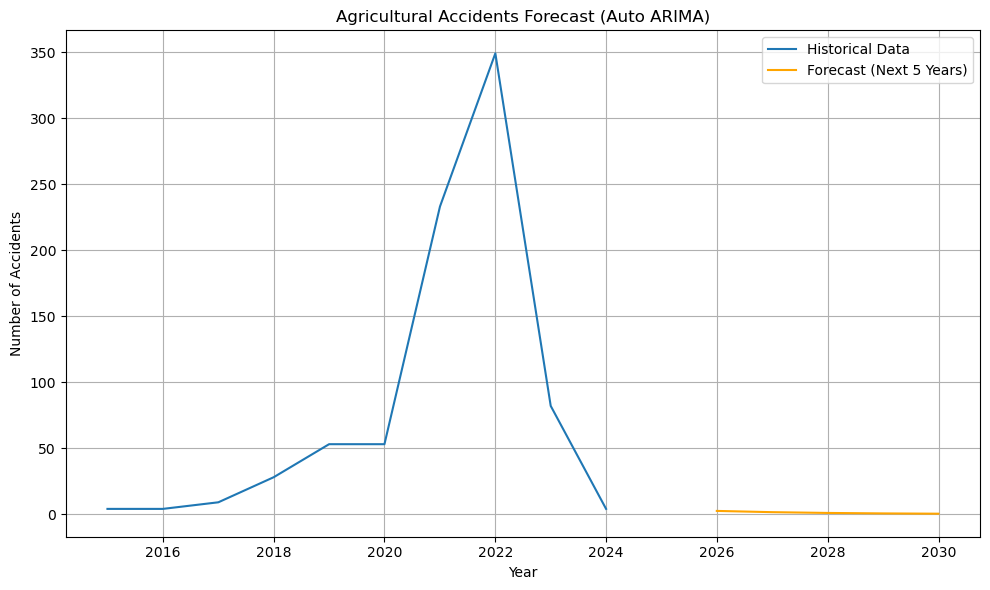

In [17]:
# Fit the ARIMA model on the full data
arima_model = auto_model.fit(yearly_accidents)

# Forecast for the next 5 years
forecast = arima_model.predict(n_periods=5)

# Get the forecast index for the next 5 years
forecast_index = pd.date_range(start=yearly_accidents.index[-1], periods=6, freq='Y')[1:]

# Print the forecasted values
print("Forecast for the next 5 years:", forecast)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents, label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast (Next 5 Years)', color='orange')
plt.title('Agricultural Accidents Forecast (Auto ARIMA)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


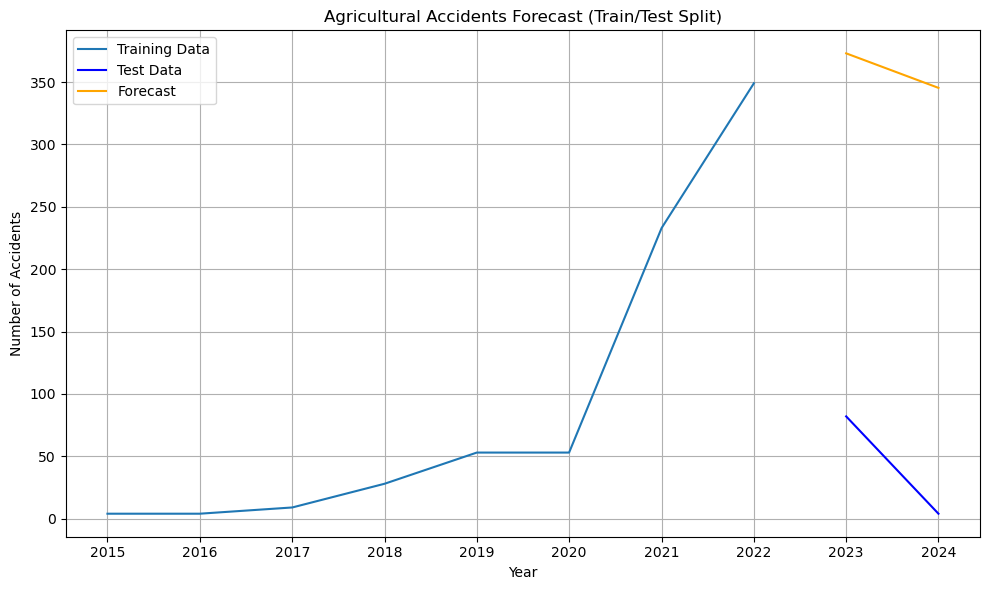

Mean Absolute Error: 316.14803124749056
Mean Squared Error: 100583.01842728764
Root Mean Squared Error: 317.1482593792494


In [18]:
# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(yearly_accidents) * 0.8)
train_data = yearly_accidents[:train_size]
test_data = yearly_accidents[train_size:]

# Fit the ARIMA model on the training data
auto_model = auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)
arima_model = auto_model.fit(train_data)

# Forecast for the test period
forecast_test = arima_model.predict(n_periods=len(test_data))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(test_data.index, forecast_test, label='Forecast', color='orange')
plt.title('Agricultural Accidents Forecast (Train/Test Split)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the model using error metrics
mse = mean_squared_error(test_data, forecast_test)
mae = mean_absolute_error(test_data, forecast_test)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


use of another model for forcasting 
using facebook prophet

In [19]:
from fbprophet import Prophet

# Prepare the data for Prophet
prophet_data = yearly_accidents.reset_index()
prophet_data.columns = ['ds', 'y']  # Rename columns to fit Prophet's requirement

# Initialize the model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(prophet_data)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=5, freq='Y')  # Predict for the next 5 years
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)
plt.title('Agricultural Accidents Forecast (Prophet)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

In [21]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (4, 1, 3)
Shape of X_test: (0,)


In [22]:
if X_test.shape[0] > 0 and X_test.shape[1] > 0:
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
else:
    print("X_test does not have valid data.")


X_test does not have valid data.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (update the file path accordingly)
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
excel_data = pd.ExcelFile("C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx")

# Load the data from Sheet1
sheet1_data = excel_data.parse('Sheet1')

# Convert 'Year' to numeric and filter for 2015-2024
sheet1_data['Year'] = pd.to_numeric(sheet1_data['Year'], errors='coerce')
filtered_data = sheet1_data[(sheet1_data['Year'] >= 2015) & (sheet1_data['Year'] <= 2024)]

# Aggregate the number of accidents per year
yearly_accidents = filtered_data.groupby('Year')['IncidenceId'].count()

# If needed, convert the 'Year' to a datetime object
yearly_accidents.index = pd.to_datetime(yearly_accidents.index, format='%Y')

# Display the yearly aggregated data
print(yearly_accidents)

Year
2015-01-01      4
2016-01-01      4
2017-01-01      9
2018-01-01     28
2019-01-01     53
2020-01-01     53
2021-01-01    233
2022-01-01    349
2023-01-01     82
2024-01-01      4
Name: IncidenceId, dtype: int64


In [28]:
# Step 1: Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Step 2: Encode 'AccidentTime' using LabelEncoder
label_encoder_time = LabelEncoder()
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Now you can proceed with the rest of the preprocessing as before.


Epoch 1/100
41/41 - 4s - loss: 0.0124 - 4s/epoch - 92ms/step
Epoch 2/100
41/41 - 0s - loss: 0.0036 - 129ms/epoch - 3ms/step
Epoch 3/100
41/41 - 0s - loss: 0.0034 - 129ms/epoch - 3ms/step
Epoch 4/100
41/41 - 0s - loss: 0.0033 - 134ms/epoch - 3ms/step
Epoch 5/100
41/41 - 0s - loss: 0.0032 - 126ms/epoch - 3ms/step
Epoch 6/100
41/41 - 0s - loss: 0.0031 - 127ms/epoch - 3ms/step
Epoch 7/100
41/41 - 0s - loss: 0.0031 - 133ms/epoch - 3ms/step
Epoch 8/100
41/41 - 0s - loss: 0.0030 - 132ms/epoch - 3ms/step
Epoch 9/100
41/41 - 0s - loss: 0.0030 - 132ms/epoch - 3ms/step
Epoch 10/100
41/41 - 0s - loss: 0.0030 - 133ms/epoch - 3ms/step
Epoch 11/100
41/41 - 0s - loss: 0.0030 - 131ms/epoch - 3ms/step
Epoch 12/100
41/41 - 0s - loss: 0.0029 - 132ms/epoch - 3ms/step
Epoch 13/100
41/41 - 0s - loss: 0.0029 - 131ms/epoch - 3ms/step
Epoch 14/100
41/41 - 0s - loss: 0.0028 - 127ms/epoch - 3ms/step
Epoch 15/100
41/41 - 0s - loss: 0.0029 - 128ms/epoch - 3ms/step
Epoch 16/100
41/41 - 0s - loss: 0.0029 - 134ms/epoc

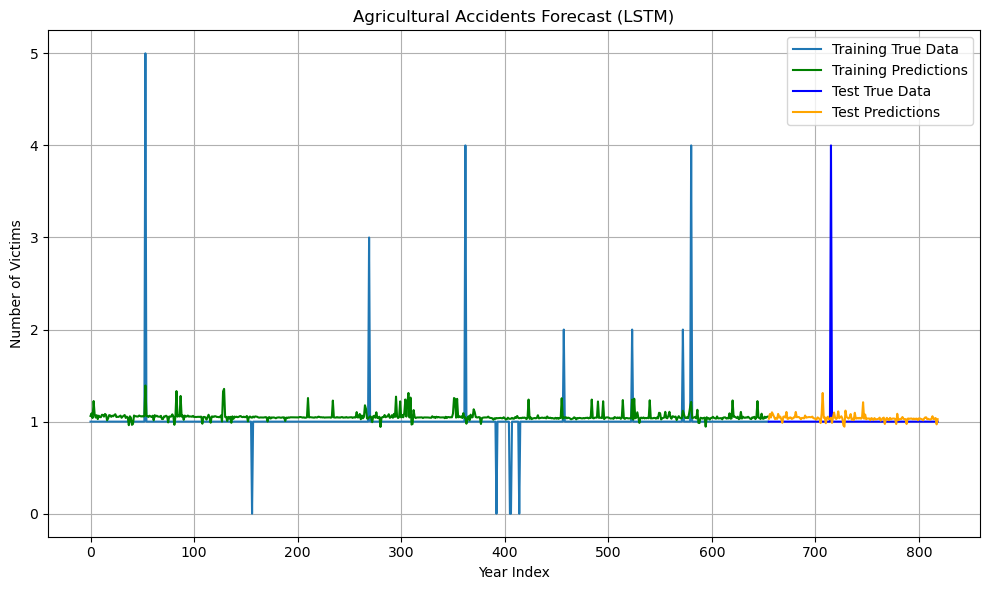

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Convert 'AccidentTime' into meaningful categories
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Step 4: Preprocessing
# Encoding categorical features
label_encoder_place = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_time = LabelEncoder()

data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Define X (features) and Y (target)
X = data[['Year', 'AccidentPlace', 'EquipmentName', 'AccidentTime', 'CauseOfAccident']].values
y = data['NumberOfVictim'].values  # Assuming 'NumberOfVictim' is the target

# Normalize the X features (min-max scaling)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Normalize the target variable (Y)
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Step 5: Split into training and test sets (80% train, 20% test)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Step 6: Reshape the data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Step 7: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 8: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

# Step 9: Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
train_predict = scaler_y.inverse_transform(train_predict)
test_predict = scaler_y.inverse_transform(test_predict)
y_train = scaler_y.inverse_transform(y_train)
y_test = scaler_y.inverse_transform(y_test)

# Step 10: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Training True Data')
plt.plot(range(len(train_predict)), train_predict, label='Training Predictions', color='green')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test True Data', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(test_predict)), test_predict, label='Test Predictions', color='orange')
plt.title('Agricultural Accidents Forecast (LSTM)')
plt.xlabel('Year Index')
plt.ylabel('Number of Victims')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# Check the shape before reshaping
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

# Check if X_test has valid data before reshaping
if X_test.shape[0] > 0 and X_test.shape[1] > 0:
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
else:
    print("X_test does not have valid data.")


Shape of X_train: (5, 1, 3)
Shape of X_test: (0,)


ValueError: cannot reshape array of size 15 into shape (5,1,1)

In [3]:
look_back = 1  # Reduce the look-back window to avoid empty test data


Epoch 1/100
1/1 - 4s - loss: 0.1973 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.1921 - 8ms/epoch - 8ms/step
Epoch 3/100
1/1 - 0s - loss: 0.1872 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 0.1827 - 8ms/epoch - 8ms/step
Epoch 5/100
1/1 - 0s - loss: 0.1783 - 8ms/epoch - 8ms/step
Epoch 6/100
1/1 - 0s - loss: 0.1742 - 0s/epoch - 0s/step
Epoch 7/100
1/1 - 0s - loss: 0.1704 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0s - loss: 0.1667 - 8ms/epoch - 8ms/step
Epoch 9/100
1/1 - 0s - loss: 0.1632 - 8ms/epoch - 8ms/step
Epoch 10/100
1/1 - 0s - loss: 0.1598 - 15ms/epoch - 15ms/step
Epoch 11/100
1/1 - 0s - loss: 0.1567 - 8ms/epoch - 8ms/step
Epoch 12/100
1/1 - 0s - loss: 0.1536 - 9ms/epoch - 9ms/step
Epoch 13/100
1/1 - 0s - loss: 0.1507 - 10ms/epoch - 10ms/step
Epoch 14/100
1/1 - 0s - loss: 0.1480 - 9ms/epoch - 9ms/step
Epoch 15/100
1/1 - 0s - loss: 0.1453 - 6ms/epoch - 6ms/step
Epoch 16/100
1/1 - 0s - loss: 0.1427 - 8ms/epoch - 8ms/step
Epoch 17/100
1/1 - 0s - loss: 0.1401 - 9ms/epoch 

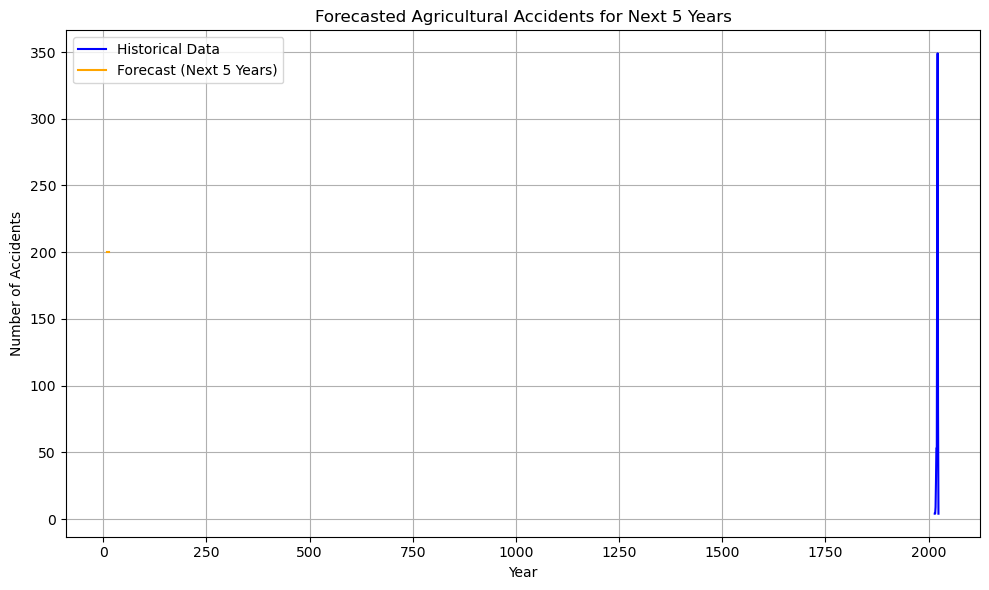

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Preprocessing
# Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Encode all categorical features
label_encoder_place = LabelEncoder()
label_encoder_type = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_catdesc = LabelEncoder()
label_encoder_subcatdesc = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_reason = LabelEncoder()
label_encoder_time = LabelEncoder()

# Apply encoding
data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['AccidentType'] = label_encoder_type.fit_transform(data['AccidentType'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['CatDesc'] = label_encoder_catdesc.fit_transform(data['CatDesc'])
data['SubCatDesc'] = label_encoder_subcatdesc.fit_transform(data['SubCatDesc'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['Reason'] = label_encoder_reason.fit_transform(data['Reason'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Step 4: Aggregate the number of accidents per year
data['AccidentCount'] = 1  # Each record represents 1 accident
yearly_accidents = data.groupby('Year').agg({'AccidentCount': 'sum'}).reset_index()

# Step 5: Prepare the feature set (X) with all other features for each year
# Exclude non-numeric features and use only numerical/categorical encoded features
numeric_features = ['AccidentPlace', 'AccidentType', 'Gender', 'CatDesc', 'SubCatDesc', 
                    'EquipmentName', 'CauseOfAccident', 'Reason', 'AccidentTime']

grouped_features = data.groupby('Year')[numeric_features].mean()

# Merge accident counts with the features (grouped_features already has Year as index, no need for reset_index)
yearly_data = pd.merge(grouped_features, yearly_accidents, on='Year')

# Step 6: Define X (features) and y (target)
X = yearly_data[numeric_features].values
y = yearly_data['AccidentCount'].values  # Target: total accidents for the year

# Normalize features (X) and target (y)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Step 7: Split the data into training and test sets (80% train, 20% test)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Step 8: Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Step 9: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))  # Output layer for total accidents
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 10: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

# Step 11: Make predictions on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
train_predict = scaler_y.inverse_transform(train_predict)
test_predict = scaler_y.inverse_transform(test_predict)

# Step 12: Forecast the next 5 years of accidents
# Use the last known data point to forecast the next 5 years
last_known_data = X_scaled[-1].reshape(1, 1, X_scaled.shape[1])  # Shape should match training input (1, 1, 9)

next_5_years = []
for i in range(5):
    next_year_prediction = model.predict(last_known_data)
    next_5_years.append(next_year_prediction[0][0])
    
    # Repeat last known data with the shape (1, 1, 9) for each prediction
    last_known_data = np.reshape(X_scaled[-1], (1, 1, X_scaled.shape[1]))

# Inverse transform the forecasted data for next 5 years
next_5_years = scaler_y.inverse_transform(np.array(next_5_years).reshape(-1, 1))

# Display the predictions for the next 5 years
print("Predicted number of accidents for the next 5 years:")
print(next_5_years)

# Step 13: Plot the results for training, testing, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents['Year'], yearly_accidents['AccidentCount'], label='Historical Data', color='blue')
plt.plot(range(len(yearly_accidents['Year']), len(yearly_accidents['Year']) + 5), next_5_years, label='Forecast (Next 5 Years)', color='orange')
plt.title('Forecasted Agricultural Accidents for Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/100
1/1 - 4s - loss: 0.1830 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.1780 - 7ms/epoch - 7ms/step
Epoch 3/100
1/1 - 0s - loss: 0.1732 - 5ms/epoch - 5ms/step
Epoch 4/100
1/1 - 0s - loss: 0.1688 - 9ms/epoch - 9ms/step
Epoch 5/100
1/1 - 0s - loss: 0.1646 - 8ms/epoch - 8ms/step
Epoch 6/100
1/1 - 0s - loss: 0.1608 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 0.1572 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0s - loss: 0.1538 - 9ms/epoch - 9ms/step
Epoch 9/100
1/1 - 0s - loss: 0.1506 - 10ms/epoch - 10ms/step
Epoch 10/100
1/1 - 0s - loss: 0.1476 - 8ms/epoch - 8ms/step
Epoch 11/100
1/1 - 0s - loss: 0.1448 - 8ms/epoch - 8ms/step
Epoch 12/100
1/1 - 0s - loss: 0.1421 - 8ms/epoch - 8ms/step
Epoch 13/100
1/1 - 0s - loss: 0.1395 - 6ms/epoch - 6ms/step
Epoch 14/100
1/1 - 0s - loss: 0.1371 - 7ms/epoch - 7ms/step
Epoch 15/100
1/1 - 0s - loss: 0.1347 - 10ms/epoch - 10ms/step
Epoch 16/100
1/1 - 0s - loss: 0.1325 - 4ms/epoch - 4ms/step
Epoch 17/100
1/1 - 0s - loss: 0.1303 - 8ms/epoc

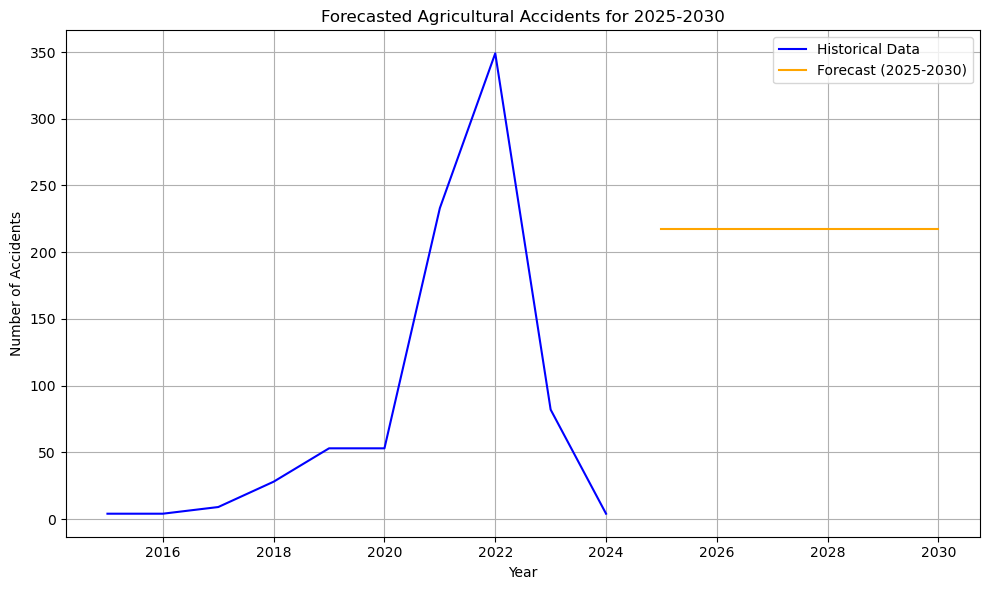

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Preprocessing
# Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Encode all categorical features
label_encoder_place = LabelEncoder()
label_encoder_type = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_catdesc = LabelEncoder()
label_encoder_subcatdesc = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_reason = LabelEncoder()
label_encoder_time = LabelEncoder()

# Apply encoding
data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['AccidentType'] = label_encoder_type.fit_transform(data['AccidentType'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['CatDesc'] = label_encoder_catdesc.fit_transform(data['CatDesc'])
data['SubCatDesc'] = label_encoder_subcatdesc.fit_transform(data['SubCatDesc'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['Reason'] = label_encoder_reason.fit_transform(data['Reason'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Step 4: Aggregate the number of accidents per year
data['AccidentCount'] = 1  # Each record represents 1 accident
yearly_accidents = data.groupby('Year').agg({'AccidentCount': 'sum'}).reset_index()

# Step 5: Prepare the feature set (X) with all other features for each year
numeric_features = ['AccidentPlace', 'AccidentType', 'Gender', 'CatDesc', 'SubCatDesc', 
                    'EquipmentName', 'CauseOfAccident', 'Reason', 'AccidentTime']

grouped_features = data.groupby('Year')[numeric_features].mean()

# Merge accident counts with the features (grouped_features already has Year as index, no need for reset_index)
yearly_data = pd.merge(grouped_features, yearly_accidents, on='Year')

# Step 6: Define X (features) and y (target)
X = yearly_data[numeric_features].values
y = yearly_data['AccidentCount'].values  # Target: total accidents for the year

# Normalize features (X) and target (y)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Step 7: Split the data into training and test sets (80% train, 20% test)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Step 8: Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Step 9: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))  # Output layer for total accidents
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 10: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

# Step 11: Forecast the number of accidents for 2025 to 2030
# Use the mean of the last known data point to simulate the features for the next 5 years
next_5_years = []
for year in range(2025, 2031):  # Predict from 2025 to 2030
    next_year_prediction = model.predict(X_train[-1].reshape(1, 1, X_train.shape[2]))
    next_5_years.append(next_year_prediction[0][0])

# Inverse transform the forecasted data for 2025 to 2030
next_5_years = scaler_y.inverse_transform(np.array(next_5_years).reshape(-1, 1))

# Display the predictions for 2025-2030
print("Predicted number of accidents for the years 2025 to 2030:")
for year, prediction in zip(range(2025, 2031), next_5_years):
    print(f"Year {year}: {prediction[0]}")

# Step 12: Plot the results for training, testing, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents['Year'], yearly_accidents['AccidentCount'], label='Historical Data', color='blue')
plt.plot(range(2025, 2031), next_5_years, label='Forecast (2025-2030)', color='orange')
plt.title('Forecasted Agricultural Accidents for 2025-2030')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
1/1 - 4s - loss: 0.3123 - 4s/epoch - 4s/step
Epoch 2/200
1/1 - 0s - loss: 0.3060 - 9ms/epoch - 9ms/step
Epoch 3/200
1/1 - 0s - loss: 0.2781 - 9ms/epoch - 9ms/step
Epoch 4/200
1/1 - 0s - loss: 0.2528 - 13ms/epoch - 13ms/step
Epoch 5/200
1/1 - 0s - loss: 0.2159 - 11ms/epoch - 11ms/step
Epoch 6/200
1/1 - 0s - loss: 0.2223 - 11ms/epoch - 11ms/step
Epoch 7/200
1/1 - 0s - loss: 0.1838 - 7ms/epoch - 7ms/step
Epoch 8/200
1/1 - 0s - loss: 0.1873 - 9ms/epoch - 9ms/step
Epoch 9/200
1/1 - 0s - loss: 0.1686 - 9ms/epoch - 9ms/step
Epoch 10/200
1/1 - 0s - loss: 0.1618 - 11ms/epoch - 11ms/step
Epoch 11/200
1/1 - 0s - loss: 0.1643 - 12ms/epoch - 12ms/step
Epoch 12/200
1/1 - 0s - loss: 0.1808 - 11ms/epoch - 11ms/step
Epoch 13/200
1/1 - 0s - loss: 0.1442 - 10ms/epoch - 10ms/step
Epoch 14/200
1/1 - 0s - loss: 0.1612 - 6ms/epoch - 6ms/step
Epoch 15/200
1/1 - 0s - loss: 0.1404 - 10ms/epoch - 10ms/step
Epoch 16/200
1/1 - 0s - loss: 0.1424 - 8ms/epoch - 8ms/step
Epoch 17/200
1/1 - 0s - loss: 0.127

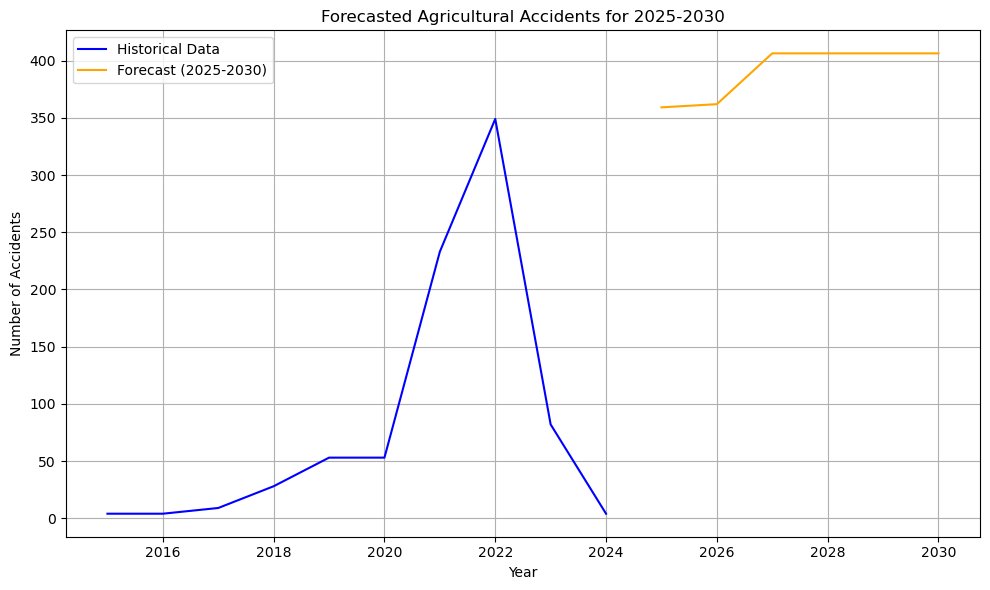

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Preprocessing
# Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Encode all categorical features
label_encoder_place = LabelEncoder()
label_encoder_type = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_catdesc = LabelEncoder()
label_encoder_subcatdesc = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_reason = LabelEncoder()
label_encoder_time = LabelEncoder()

# Apply encoding
data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['AccidentType'] = label_encoder_type.fit_transform(data['AccidentType'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['CatDesc'] = label_encoder_catdesc.fit_transform(data['CatDesc'])
data['SubCatDesc'] = label_encoder_subcatdesc.fit_transform(data['SubCatDesc'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['Reason'] = label_encoder_reason.fit_transform(data['Reason'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Step 4: Aggregate the number of accidents per year
data['AccidentCount'] = 1  # Each record represents 1 accident
yearly_accidents = data.groupby('Year').agg({'AccidentCount': 'sum'}).reset_index()

# Step 5: Prepare the feature set (X) with all other features for each year
numeric_features = ['AccidentPlace', 'AccidentType', 'Gender', 'CatDesc', 'SubCatDesc', 
                    'EquipmentName', 'CauseOfAccident', 'Reason', 'AccidentTime']

grouped_features = data.groupby('Year')[numeric_features].mean()

# Merge accident counts with the features (grouped_features already has Year as index, no need for reset_index)
yearly_data = pd.merge(grouped_features, yearly_accidents, on='Year')

# Step 6: Define X (features) and y (target)
X = yearly_data[numeric_features].values
y = yearly_data['AccidentCount'].values  # Target: total accidents for the year

# Normalize features (X) and target (y)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Step 7: Create sequences with a look-back window of 3 years
def create_sequences(X, y, look_back=3):
    Xs, ys = [], []
    for i in range(look_back, len(X)):
        Xs.append(X[i-look_back:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

look_back = 3
X_seq, y_seq = create_sequences(X_scaled, y_scaled, look_back)

# Step 8: Split the data into training and test sets (80% train, 20% test)
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Step 9: Build the LSTM model with Dropout
model = Sequential()
model.add(LSTM(units=100, return_sequences=False, input_shape=(look_back, X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(1))  # Output layer for total accidents
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 10: Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)

# Step 11: Evaluate on test set
test_predict = model.predict(X_test)
test_predict = scaler_y.inverse_transform(test_predict)

# Step 12: Forecast the number of accidents for 2025 to 2030
# Use the last 3 years of data to forecast future accidents
X_input = X_seq[-1].reshape(1, look_back, X_seq.shape[2])
next_5_years = []

for year in range(2025, 2031):  # Predict from 2025 to 2030
    next_year_prediction = model.predict(X_input)
    next_5_years.append(next_year_prediction[0][0])
    
    # Update X_input without reshaping the array to keep the feature structure
    X_input = np.append(X_input[:, 1:, :], X_input[:, -1:, :], axis=1)

# Inverse transform the forecasted data for 2025 to 2030
next_5_years = scaler_y.inverse_transform(np.array(next_5_years).reshape(-1, 1))

# Display the predictions for 2025-2030
print("Predicted number of accidents for the years 2025 to 2030:")
for year, prediction in zip(range(2025, 2031), next_5_years):
    print(f"Year {year}: {prediction[0]}")

# Step 13: Plot the results for training, testing, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents['Year'], yearly_accidents['AccidentCount'], label='Historical Data', color='blue')
plt.plot(range(2025, 2031), next_5_years, label='Forecast (2025-2030)', color='orange')
plt.title('Forecasted Agricultural Accidents for 2025-2030')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


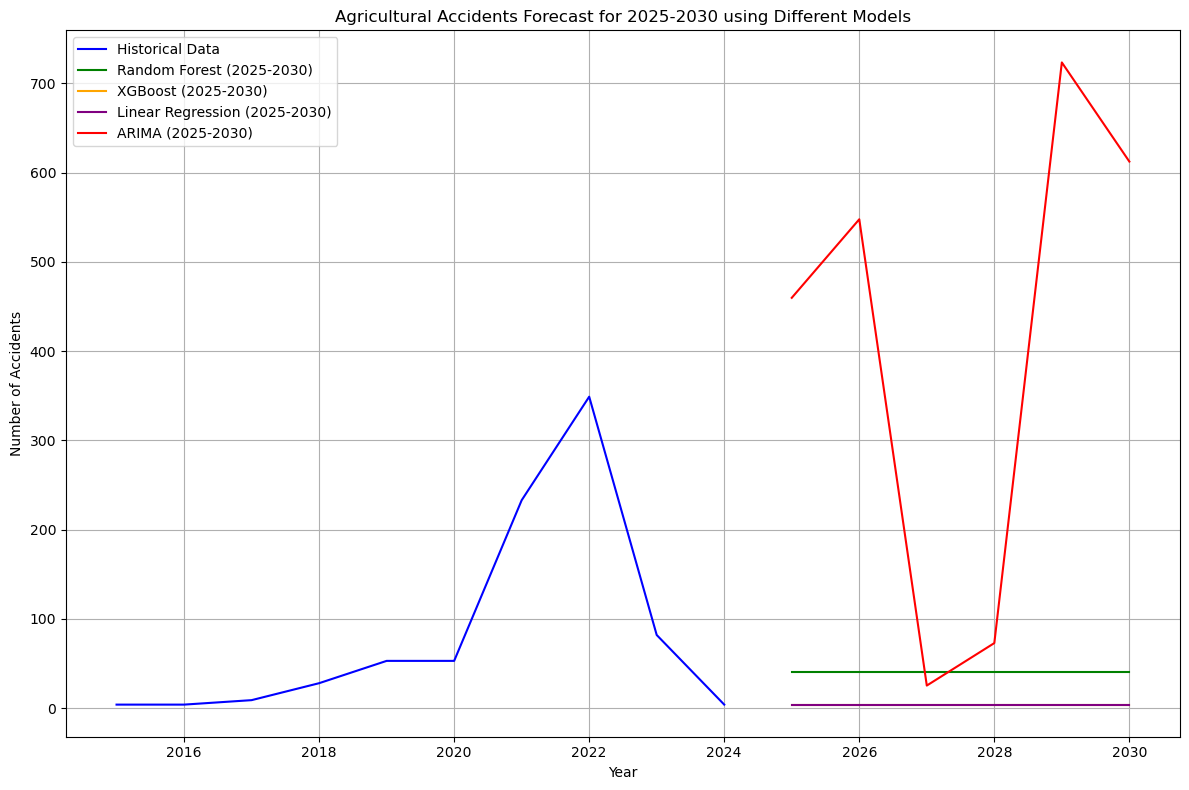

Predictions for 2025 to 2030:
Random Forest: [array([40.01]), array([40.01]), array([40.01]), array([40.01]), array([40.01]), array([40.01])]
XGBoost: [array([4.000687], dtype=float32), array([4.000687], dtype=float32), array([4.000687], dtype=float32), array([4.000687], dtype=float32), array([4.000687], dtype=float32), array([4.000687], dtype=float32)]
Linear Regression: [array([4.]), array([4.]), array([4.]), array([4.]), array([4.]), array([4.])]
ARIMA: [459.80347951 547.79791937  25.34905967  72.94218672 723.53101376
 612.46795192]


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Preprocessing
# Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Encode all categorical features
label_encoder_place = LabelEncoder()
label_encoder_type = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_catdesc = LabelEncoder()
label_encoder_subcatdesc = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_reason = LabelEncoder()
label_encoder_time = LabelEncoder()

# Apply encoding
data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['AccidentType'] = label_encoder_type.fit_transform(data['AccidentType'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['CatDesc'] = label_encoder_catdesc.fit_transform(data['CatDesc'])
data['SubCatDesc'] = label_encoder_subcatdesc.fit_transform(data['SubCatDesc'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['Reason'] = label_encoder_reason.fit_transform(data['Reason'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Step 4: Aggregate the number of accidents per year
data['AccidentCount'] = 1  # Each record represents 1 accident
yearly_accidents = data.groupby('Year').agg({'AccidentCount': 'sum'}).reset_index()

# Step 5: Prepare the feature set (X) with all other features for each year
numeric_features = ['AccidentPlace', 'AccidentType', 'Gender', 'CatDesc', 'SubCatDesc', 
                    'EquipmentName', 'CauseOfAccident', 'Reason', 'AccidentTime']

grouped_features = data.groupby('Year')[numeric_features].mean()

# Merge accident counts with the features
yearly_data = pd.merge(grouped_features, yearly_accidents, on='Year')

# Step 6: Define X (features) and y (target)
X = yearly_data[numeric_features].values
y = yearly_data['AccidentCount'].values  # Target: total accidents for the year

# Normalize features (X)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# --- Model 1: Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Predict accidents for 2025 to 2030 using the last known feature values
rf_pred = []
for i in range(2025, 2031):
    rf_pred.append(rf_model.predict([X_scaled[-1]]))

# --- Model 2: XGBoost Regressor ---
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_scaled, y)

xgb_pred = []
for i in range(2025, 2031):
    xgb_pred.append(xgb_model.predict([X_scaled[-1]]))

# --- Model 3: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

lr_pred = []
for i in range(2025, 2031):
    lr_pred.append(lr_model.predict([X_scaled[-1]]))

# --- Model 4: ARIMA (Time Series Forecasting) ---
# Using only the target 'y' for ARIMA since it's a time series method
arima_model = ARIMA(y, order=(5, 1, 0))  # Adjust (p, d, q) values as needed
arima_model_fit = arima_model.fit()

# Forecasting the next 6 years (2025 to 2030)
arima_forecast = arima_model_fit.forecast(steps=6)

# Step 7: Plot all model forecasts
years = list(range(2025, 2031))

plt.figure(figsize=(12, 8))
plt.plot(yearly_accidents['Year'], yearly_accidents['AccidentCount'], label='Historical Data', color='blue')
plt.plot(years, rf_pred, label='Random Forest (2025-2030)', color='green')
plt.plot(years, xgb_pred, label='XGBoost (2025-2030)', color='orange')
plt.plot(years, lr_pred, label='Linear Regression (2025-2030)', color='purple')
plt.plot(years, arima_forecast, label='ARIMA (2025-2030)', color='red')

plt.title('Agricultural Accidents Forecast for 2025-2030 using Different Models')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display predictions
print("Predictions for 2025 to 2030:")
print("Random Forest:", rf_pred)
print("XGBoost:", xgb_pred)
print("Linear Regression:", lr_pred)
print("ARIMA:", arima_forecast)


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


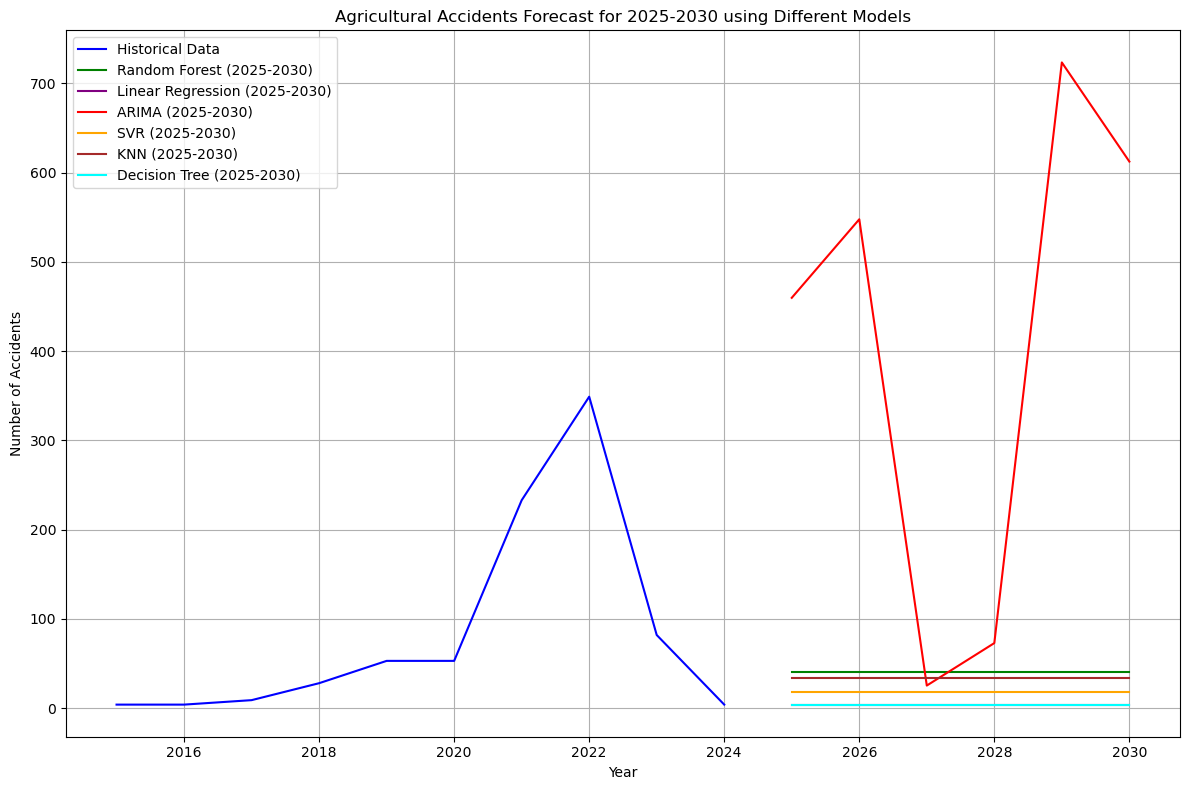

Predictions for 2025 to 2030:
Random Forest: [array([40.01]), array([40.01]), array([40.01]), array([40.01]), array([40.01]), array([40.01])]
Linear Regression: [array([4.]), array([4.]), array([4.]), array([4.]), array([4.]), array([4.])]
ARIMA: [459.80347951 547.79791937  25.34905967  72.94218672 723.53101376
 612.46795192]
SVR: [array([18.10035513]), array([18.10035513]), array([18.10035513]), array([18.10035513]), array([18.10035513]), array([18.10035513])]
KNN: [array([34.2]), array([34.2]), array([34.2]), array([34.2]), array([34.2]), array([34.2])]
Decision Tree: [array([4.]), array([4.]), array([4.]), array([4.]), array([4.]), array([4.])]


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Preprocessing
# Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Encode all categorical features
label_encoder_place = LabelEncoder()
label_encoder_type = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_catdesc = LabelEncoder()
label_encoder_subcatdesc = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_reason = LabelEncoder()
label_encoder_time = LabelEncoder()

# Apply encoding
data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['AccidentType'] = label_encoder_type.fit_transform(data['AccidentType'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['CatDesc'] = label_encoder_catdesc.fit_transform(data['CatDesc'])
data['SubCatDesc'] = label_encoder_subcatdesc.fit_transform(data['SubCatDesc'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['Reason'] = label_encoder_reason.fit_transform(data['Reason'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Step 4: Aggregate the number of accidents per year
data['AccidentCount'] = 1  # Each record represents 1 accident
yearly_accidents = data.groupby('Year').agg({'AccidentCount': 'sum'}).reset_index()

# Step 5: Prepare the feature set (X) with all other features for each year
numeric_features = ['AccidentPlace', 'AccidentType', 'Gender', 'CatDesc', 'SubCatDesc', 
                    'EquipmentName', 'CauseOfAccident', 'Reason', 'AccidentTime']

grouped_features = data.groupby('Year')[numeric_features].mean()

# Merge accident counts with the features
yearly_data = pd.merge(grouped_features, yearly_accidents, on='Year')

# Step 6: Define X (features) and y (target)
X = yearly_data[numeric_features].values
y = yearly_data['AccidentCount'].values  # Target: total accidents for the year

# Normalize features (X)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# --- Model 1: Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

rf_pred = [rf_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 2: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

lr_pred = [lr_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 3: ARIMA (Time Series Forecasting) ---
arima_model = ARIMA(y, order=(5, 1, 0))  # Adjust (p, d, q) values as needed
arima_model_fit = arima_model.fit()

arima_forecast = arima_model_fit.forecast(steps=6)

# --- Model 4: Support Vector Regressor (SVR) ---
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_scaled, y)

svr_pred = [svr_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 5: K-Nearest Neighbors (KNN) Regressor ---
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_scaled, y)

knn_pred = [knn_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 6: Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_scaled, y)

dt_pred = [dt_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# Step 7: Plot all model forecasts
years = list(range(2025, 2031))

plt.figure(figsize=(12, 8))
plt.plot(yearly_accidents['Year'], yearly_accidents['AccidentCount'], label='Historical Data', color='blue')
plt.plot(years, rf_pred, label='Random Forest (2025-2030)', color='green')
plt.plot(years, lr_pred, label='Linear Regression (2025-2030)', color='purple')
plt.plot(years, arima_forecast, label='ARIMA (2025-2030)', color='red')
plt.plot(years, svr_pred, label='SVR (2025-2030)', color='orange')
plt.plot(years, knn_pred, label='KNN (2025-2030)', color='brown')
plt.plot(years, dt_pred, label='Decision Tree (2025-2030)', color='cyan')

plt.title('Agricultural Accidents Forecast for 2025-2030 using Different Models')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display predictions for each model
print("Predictions for 2025 to 2030:")
print("Random Forest:", rf_pred)
print("Linear Regression:", lr_pred)
print("ARIMA:", arima_forecast)
print("SVR:", svr_pred)
print("KNN:", knn_pred)
print("Decision Tree:", dt_pred)


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/200
1/1 - 4s - loss: 36486.1875 - 4s/epoch - 4s/step
Epoch 2/200
1/1 - 0s - loss: 36472.4141 - 8ms/epoch - 8ms/step
Epoch 3/200
1/1 - 0s - loss: 36452.7266 - 11ms/epoch - 11ms/step
Epoch 4/200
1/1 - 0s - loss: 36446.1055 - 8ms/epoch - 8ms/step
Epoch 5/200
1/1 - 0s - loss: 36429.9141 - 10ms/epoch - 10ms/step
Epoch 6/200
1/1 - 0s - loss: 36419.0312 - 9ms/epoch - 9ms/step
Epoch 7/200
1/1 - 0s - loss: 36395.7656 - 10ms/epoch - 10ms/step
Epoch 8/200
1/1 - 0s - loss: 36389.2461 - 11ms/epoch - 11ms/step
Epoch 9/200
1/1 - 0s - loss: 36372.9023 - 9ms/epoch - 9ms/step
Epoch 10/200
1/1 - 0s - loss: 36339.9102 - 10ms/epoch - 10ms/step
Epoch 11/200
1/1 - 0s - loss: 36325.4688 - 8ms/epoch - 8ms/step
Epoch 12/200
1/1 - 0s - loss: 36310.2422 - 9ms/epoch - 9ms/step
Epoch 13/200
1/1 - 0s - loss: 36287.1602 - 9ms/epoch - 9ms/step
Epoch 14/200
1/1 - 0s - loss: 36248.5703 - 11ms/epoch - 11ms/step
Epoch 15/200
1/1 - 0s - loss: 36241.8203 - 7ms/epoch - 7ms/step
Epoch 16/200
1/1 - 0s - loss: 36201.695

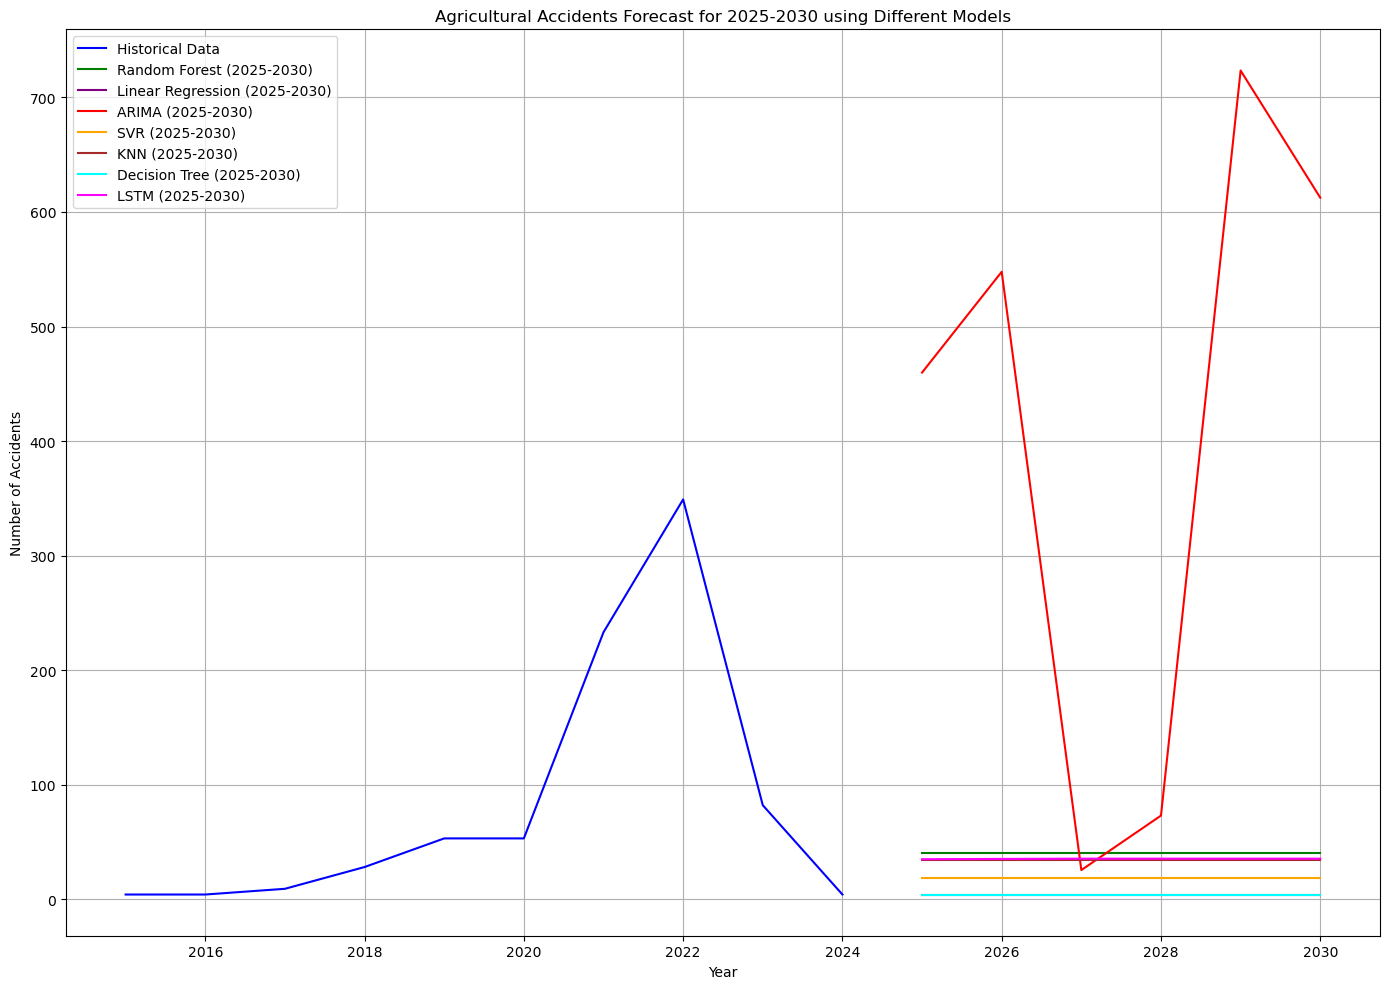

Predictions for 2025 to 2030:
Random Forest: [array([40.01]), array([40.01]), array([40.01]), array([40.01]), array([40.01]), array([40.01])]
Linear Regression: [array([4.]), array([4.]), array([4.]), array([4.]), array([4.]), array([4.])]
ARIMA: [459.80347951 547.79791937  25.34905967  72.94218672 723.53101376
 612.46795192]
SVR: [array([18.10035513]), array([18.10035513]), array([18.10035513]), array([18.10035513]), array([18.10035513]), array([18.10035513])]
KNN: [array([34.2]), array([34.2]), array([34.2]), array([34.2]), array([34.2]), array([34.2])]
Decision Tree: [array([4.]), array([4.]), array([4.]), array([4.]), array([4.]), array([4.])]
LSTM: [34.843945, 35.088734, 35.30991, 35.30991, 35.30991, 35.30991]


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Preprocessing
# Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Encode all categorical features
label_encoder_place = LabelEncoder()
label_encoder_type = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_catdesc = LabelEncoder()
label_encoder_subcatdesc = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_reason = LabelEncoder()
label_encoder_time = LabelEncoder()

# Apply encoding
data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['AccidentType'] = label_encoder_type.fit_transform(data['AccidentType'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['CatDesc'] = label_encoder_catdesc.fit_transform(data['CatDesc'])
data['SubCatDesc'] = label_encoder_subcatdesc.fit_transform(data['SubCatDesc'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['Reason'] = label_encoder_reason.fit_transform(data['Reason'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Step 4: Aggregate the number of accidents per year
data['AccidentCount'] = 1  # Each record represents 1 accident
yearly_accidents = data.groupby('Year').agg({'AccidentCount': 'sum'}).reset_index()

# Step 5: Prepare the feature set (X) with all other features for each year
numeric_features = ['AccidentPlace', 'AccidentType', 'Gender', 'CatDesc', 'SubCatDesc', 
                    'EquipmentName', 'CauseOfAccident', 'Reason', 'AccidentTime']

grouped_features = data.groupby('Year')[numeric_features].mean()

# Merge accident counts with the features
yearly_data = pd.merge(grouped_features, yearly_accidents, on='Year')

# Step 6: Define X (features) and y (target)
X = yearly_data[numeric_features].values
y = yearly_data['AccidentCount'].values  # Target: total accidents for the year

# Normalize features (X)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# --- Model 1: Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)
rf_pred = [rf_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 2: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)
lr_pred = [lr_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 3: ARIMA (Time Series Forecasting) ---
arima_model = ARIMA(y, order=(5, 1, 0))  # Adjust (p, d, q) values as needed
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=6)

# --- Model 4: Support Vector Regressor (SVR) ---
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_scaled, y)
svr_pred = [svr_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 5: K-Nearest Neighbors (KNN) Regressor ---
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_scaled, y)
knn_pred = [knn_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 6: Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_scaled, y)
dt_pred = [dt_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 7: LSTM ---
# Reshape the data for LSTM (samples, time steps, features)
look_back = 3

def create_sequences(X, y, look_back=3):
    Xs, ys = [], []
    for i in range(look_back, len(X)):
        Xs.append(X[i-look_back:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y, look_back)
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Build the LSTM model with Dropout
# --- LSTM Part (Corrected) ---

# Build the LSTM model with Dropout
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, return_sequences=False, input_shape=(look_back, X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))  # Output layer for total accidents
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=2)

# Make predictions for future years (2025-2030)
X_input = X_seq[-1].reshape(1, look_back, X_seq.shape[2])
lstm_pred = []
for i in range(2025, 2031):
    next_year_pred = lstm_model.predict(X_input)
    lstm_pred.append(next_year_pred[0][0])
    
    # Keep using the same feature matrix (X_input) without modifying the feature structure
    # We append the predicted value separately without affecting the input shape
    X_input = np.append(X_input[:, 1:, :], X_input[:, -1:, :], axis=1)  # Keep the features intact

# Step 7: Plot all model forecasts
years = list(range(2025, 2031))

plt.figure(figsize=(14, 10))
plt.plot(yearly_accidents['Year'], yearly_accidents['AccidentCount'], label='Historical Data', color='blue')
plt.plot(years, rf_pred, label='Random Forest (2025-2030)', color='green')
plt.plot(years, lr_pred, label='Linear Regression (2025-2030)', color='purple')
plt.plot(years, arima_forecast, label='ARIMA (2025-2030)', color='red')
plt.plot(years, svr_pred, label='SVR (2025-2030)', color='orange')
plt.plot(years, knn_pred, label='KNN (2025-2030)', color='brown')
plt.plot(years, dt_pred, label='Decision Tree (2025-2030)', color='cyan')
plt.plot(years, lstm_pred, label='LSTM (2025-2030)', color='magenta')

plt.title('Agricultural Accidents Forecast for 2025-2030 using Different Models')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display predictions for each model
print("Predictions for 2025 to 2030:")
print("Random Forest:", rf_pred)
print("Linear Regression:", lr_pred)
print("ARIMA:", arima_forecast)
print("SVR:", svr_pred)
print("KNN:", knn_pred)
print("Decision Tree:", dt_pred)
print("LSTM:", lstm_pred)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Epoch 1/200
22/22 - 6s - loss: 0.1430 - 6s/epoch - 294ms/step
Epoch 2/200
22/22 - 0s - loss: 0.0110 - 212ms/epoch - 10ms/step
Epoch 3/200
22/22 - 0s - loss: 0.0053 - 212ms/epoch - 10ms/step
Epoch 4/200
22/22 - 0s - loss: 0.0039 - 214ms/epoch - 10ms/step
Epoch 5/200
22/22 - 0s - loss: 0.0039 - 216ms/epoch - 10ms/step
Epoch 6/200
22/22 - 0s - loss: 0.0035 - 215ms/epoch - 10ms/step
Epoch 7/200
22/22 - 0s - loss: 0.0030 - 216ms/epoch - 10ms/step
Epoch 8/200
22/22 - 0s - loss: 0.0028 - 218ms/epoch - 10ms/step
Epoch 9/200
22/22 - 0s - loss: 0.0021 - 212ms/epoch - 10ms/step
Epoch 10/200
22/22 - 0s - loss: 0.0020 - 215ms/epoch - 10ms/step
Epoch 11/200
22/22 - 0s - loss: 0.0017 - 218ms/epoch - 10ms/step
Epoch 12/200
22/22 - 0s - loss: 0.0016 - 227ms/epoch - 10ms/step
Epoch 13/200
22/22 - 0s - loss: 0.0013 - 215ms/epoch - 10ms/step
Epoch 14/200
22/22 - 0s - loss: 0.0012 - 229ms/epoch - 10ms/step
Epoch 15/200
22/22 - 0s - loss: 9.4949e-

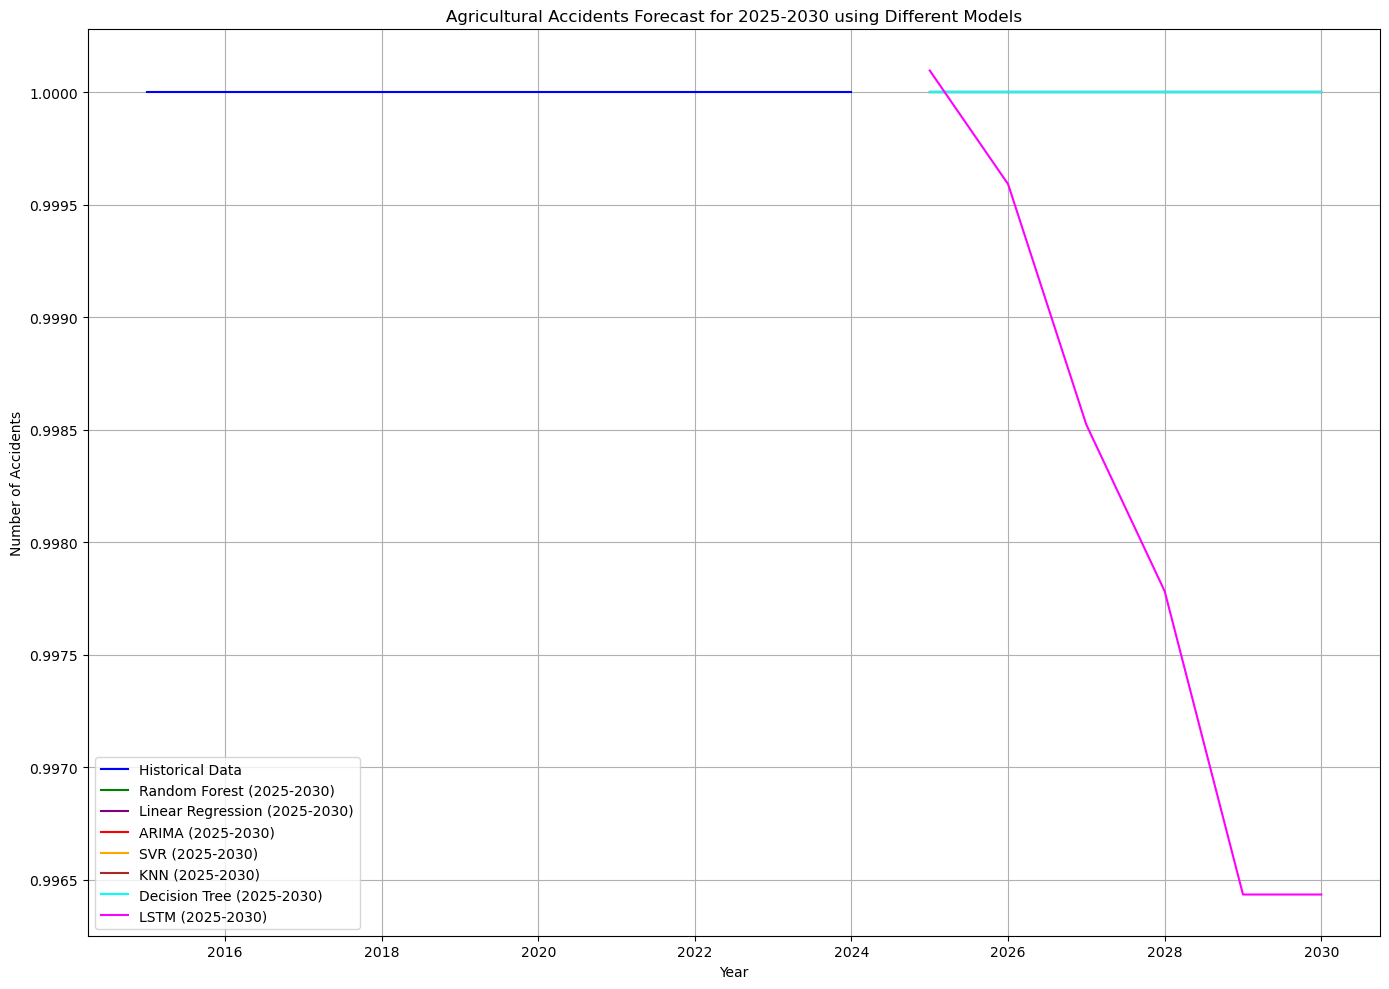

Predictions for 2025 to 2030:
Random Forest: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Linear Regression: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARIMA: [1. 1. 1. 1. 1. 1.]
SVR: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KNN: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Decision Tree: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
LSTM: [1.0000962, 0.9995916, 0.99852246, 0.99778306, 0.9964354, 0.9964354]


In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Preprocessing
# Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Encode all categorical features
label_encoder_place = LabelEncoder()
label_encoder_type = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_catdesc = LabelEncoder()
label_encoder_subcatdesc = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_reason = LabelEncoder()
label_encoder_time = LabelEncoder()

# Apply encoding
data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['AccidentType'] = label_encoder_type.fit_transform(data['AccidentType'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['CatDesc'] = label_encoder_catdesc.fit_transform(data['CatDesc'])
data['SubCatDesc'] = label_encoder_subcatdesc.fit_transform(data['SubCatDesc'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['Reason'] = label_encoder_reason.fit_transform(data['Reason'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Add AccidentCount column (assuming each row represents one accident)
data['AccidentCount'] = 1  # Each record represents 1 accident

# Step 4: Feature Engineering - Add lag features and rolling mean
for lag in range(1, 4):  # Create lag features for 1, 2, and 3 years back
    data[f'AccidentCount_Lag_{lag}'] = data['AccidentCount'].shift(lag)

# Add rolling mean
data['AccidentCount_RollingMean_3'] = data['AccidentCount'].rolling(window=3).mean()

# Drop NaN values that result from creating lag features
data.dropna(inplace=True)

# Step 5: Prepare the feature set (X) with the new features
numeric_features = ['AccidentPlace', 'AccidentType', 'Gender', 'CatDesc', 'SubCatDesc', 
                    'EquipmentName', 'CauseOfAccident', 'Reason', 'AccidentTime'] + \
                    [f'AccidentCount_Lag_{lag}' for lag in range(1, 4)] + ['AccidentCount_RollingMean_3']

X = data[numeric_features].values
y = data['AccidentCount'].values  # Target: total accidents for the year

# Normalize features (X)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# --- Model 1: Random Forest Regressor with Hyperparameter Tuning ---
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=3, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_scaled, y)
best_rf_model = grid_search_rf.best_estimator_
best_rf_pred = [best_rf_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 2: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)
lr_pred = [lr_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 3: ARIMA (Time Series Forecasting) ---
arima_model = ARIMA(y, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=6)

# --- Model 4: SVR with Hyperparameter Tuning ---
param_grid_svr = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}
grid_search_svr = GridSearchCV(estimator=SVR(kernel='rbf'), param_grid=param_grid_svr, cv=3, verbose=2, n_jobs=-1)
grid_search_svr.fit(X_scaled, y)
best_svr_model = grid_search_svr.best_estimator_
best_svr_pred = [best_svr_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 5: K-Nearest Neighbors (KNN) Regressor ---
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_scaled, y)
knn_pred = [knn_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- Model 6: Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_scaled, y)
dt_pred = [dt_model.predict([X_scaled[-1]]) for _ in range(2025, 2031)]

# --- LSTM Model ---
look_back = 5  # Use larger window size
def create_sequences(X, y, look_back):
    Xs, ys = [], []
    for i in range(look_back, len(X)):
        Xs.append(X[i-look_back:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y, look_back)

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_seq):
    X_train, X_test = X_seq[train_index], X_seq[test_index]
    y_train, y_test = y_seq[train_index], y_seq[test_index]

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)

# Make predictions for future years (2025-2030)
X_input = X_seq[-1].reshape(1, look_back, X_seq.shape[2])
lstm_pred = []
for i in range(2025, 2031):
    next_year_pred = lstm_model.predict(X_input)
    lstm_pred.append(next_year_pred[0][0])
    X_input = np.append(X_input[:, 1:, :], X_input[:, -1:, :], axis=1)

# Step 7: Plot all model forecasts
# Step 7: Plot all model forecasts
years = list(range(2025, 2031))  
# Forecast years

plt.figure(figsize=(14, 10))
plt.plot(data['Year'], data['AccidentCount'], label='Historical Data', color='blue')
plt.plot(years, best_rf_pred, label='Random Forest (2025-2030)', color='green')
plt.plot(years, lr_pred, label='Linear Regression (2025-2030)', color='purple')
plt.plot(years, arima_forecast, label='ARIMA (2025-2030)', color='red')
plt.plot(years, best_svr_pred, label='SVR (2025-2030)', color='orange')
plt.plot(years, knn_pred, label='KNN (2025-2030)', color='brown')
plt.plot(years, dt_pred, label='Decision Tree (2025-2030)', color='cyan')
plt.plot(years, lstm_pred, label='LSTM (2025-2030)', color='magenta')

plt.title('Agricultural Accidents Forecast for 2025-2030 using Different Models')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display predictions for each model
print("Predictions for 2025 to 2030:")
print("Random Forest:", [pred[0] for pred in best_rf_pred])
print("Linear Regression:", [pred[0] for pred in lr_pred])
print("ARIMA:", arima_forecast)
print("SVR:", [pred[0] for pred in best_svr_pred])
print("KNN:", [pred[0] for pred in knn_pred])
print("Decision Tree:", [pred[0] for pred in dt_pred])
print("LSTM:", lstm_pred)



c:\Users\02ris\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/200
1/1 - 8s - loss: 6736.5430 - 8s/epoch - 8s/step
Epoch 2/200
1/1 - 0s - loss: 6708.6611 - 11ms/epoch - 11ms/step
Epoch 3/200
1/1 - 0s - loss: 6690.7700 - 16ms/epoch - 16ms/step
Epoch 4/200
1/1 - 0s - loss: 6631.7969 - 12ms/epoch - 12ms/step
Epoch 5/200
1/1 - 0s - loss: 6598.2739 - 13ms/epoch - 13ms/step
Epoch 6/200
1/1 - 0s - loss: 6549.9106 - 12ms/epoch - 12ms/step
Epoch 7/200
1/1 - 0s - loss: 6506.3428 - 12ms/epoch - 12ms/step
Epoch 8/200
1/1 - 0s - loss: 6500.1001 - 12ms/epoch - 12ms/step
Epoch 9/200
1/1 - 0s - loss: 6498.5542 - 11ms/epoch - 11ms/step
Epoch 10/200
1/1 - 0s - loss: 6405.0952 - 12ms/epoch - 12ms/step
Epoch 11/200
1/1 - 0s - loss: 6392.7314 - 13ms/epoch - 13ms/step
Epoch 12/200
1/1 - 0s - loss: 6347.9893 - 11ms/epoch - 11ms/step
Epoch 13/200
1/1 - 0s - loss: 6292.3389 - 10ms/epoch - 10ms/step
Epoch 14/200
1/1 - 0s - loss: 6223.4575 - 11ms/epoch - 11ms/step
Epoch 15/200
1/1 - 0s - loss: 6213.9756 - 11ms/epoch - 11ms/step
Epoch 16/200
1/1 - 0s - loss: 6182.715

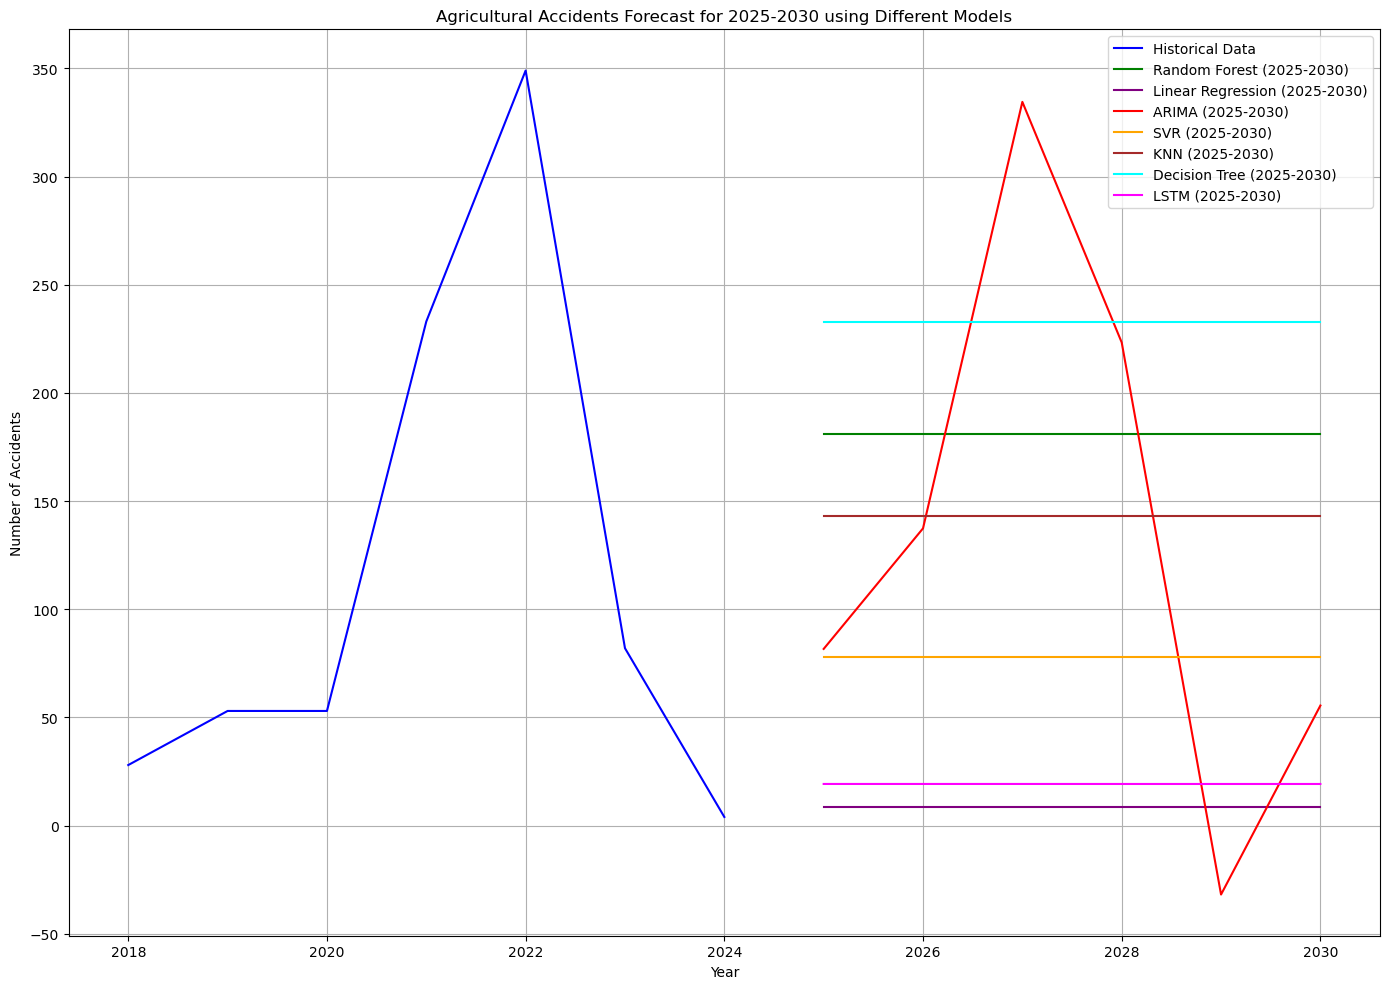

Predictions for 2025 to 2030:
Random Forest: [180, 180, 180, 180, 180, 180]
Linear Regression: [8, 8, 8, 8, 8, 8]
ARIMA: [81, 137, 334, 223, -31, 55]
SVR: [78, 78, 78, 78, 78, 78]
KNN: [143, 143, 143, 143, 143, 143]
Decision Tree: [233, 233, 233, 233, 233, 233]
LSTM: [19, 19, 19, 19, 19, 19]


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the dataset from Excel file
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\final data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Filter data for the relevant years (2015-2024)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)]

# Step 3: Preprocessing
# Convert 'AccidentTime' into categories like 'morning', 'afternoon', etc.
def categorize_time(time_str):
    if 'am' in time_str:
        return 'morning'
    elif '12pm' in time_str or '1pm' in time_str:
        return 'afternoon'
    elif 'pm' in time_str:
        return 'evening'
    else:
        return 'unknown'

data['AccidentTime'] = data['AccidentTime'].apply(categorize_time)

# Encode all categorical features
label_encoder_place = LabelEncoder()
label_encoder_type = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_catdesc = LabelEncoder()
label_encoder_subcatdesc = LabelEncoder()
label_encoder_equipment = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_reason = LabelEncoder()
label_encoder_time = LabelEncoder()

# Apply encoding
data['AccidentPlace'] = label_encoder_place.fit_transform(data['AccidentPlace'])
data['AccidentType'] = label_encoder_type.fit_transform(data['AccidentType'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['CatDesc'] = label_encoder_catdesc.fit_transform(data['CatDesc'])
data['SubCatDesc'] = label_encoder_subcatdesc.fit_transform(data['SubCatDesc'])
data['EquipmentName'] = label_encoder_equipment.fit_transform(data['EquipmentName'])
data['CauseOfAccident'] = label_encoder_cause.fit_transform(data['CauseOfAccident'])
data['Reason'] = label_encoder_reason.fit_transform(data['Reason'])
data['AccidentTime'] = label_encoder_time.fit_transform(data['AccidentTime'])

# Step 4: Aggregate the total number of accidents per year
yearly_accidents = data.groupby('Year').size().reset_index(name='AccidentCount')

# Step 5: Feature Engineering - Add lag features and rolling mean
for lag in range(1, 4):  # Create lag features for 1, 2, and 3 years back
    yearly_accidents[f'AccidentCount_Lag_{lag}'] = yearly_accidents['AccidentCount'].shift(lag)

# Add rolling mean
yearly_accidents['AccidentCount_RollingMean_3'] = yearly_accidents['AccidentCount'].rolling(window=3).mean()

# Drop NaN values that result from creating lag features
yearly_accidents.dropna(inplace=True)

# Step 6: Prepare the feature set (X) with the new features
numeric_features = [f'AccidentCount_Lag_{lag}' for lag in range(1, 4)] + ['AccidentCount_RollingMean_3']

X = yearly_accidents[numeric_features].values
y = yearly_accidents['AccidentCount'].values  # Target: total accidents for the year

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# --- Model 1: Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = [rf_model.predict([X[-1]]) for _ in range(2025, 2031)]

# --- Model 2: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = [lr_model.predict([X[-1]]) for _ in range(2025, 2031)]

# --- Model 3: ARIMA (Time Series Forecasting) ---
arima_model = ARIMA(y, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=6)

# --- Model 4: SVR ---
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)
svr_pred = [svr_model.predict([X[-1]]) for _ in range(2025, 2031)]

# --- Model 5: K-Nearest Neighbors (KNN) Regressor ---
# --- Model 5: K-Nearest Neighbors (KNN) Regressor ---
n_neighbors = min(2, len(X_train))  # Set n_neighbors to the smaller of 2 or the number of training samples
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_model.fit(X_train, y_train)
knn_pred = [knn_model.predict([X[-1]]) for _ in range(2025, 2031)]


# --- Model 6: Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = [dt_model.predict([X[-1]]) for _ in range(2025, 2031)]

# --- LSTM Model ---
look_back = 5  # Use larger window size
def create_sequences(X, y, look_back):
    Xs, ys = [], []
    for i in range(look_back, len(X)):
        Xs.append(X[i-look_back:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X, y, look_back)

# Step 7: Train-Test Split for LSTM
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.3, shuffle=False)

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)

# Make predictions for future years (2025-2030)
X_input = X_seq[-1].reshape(1, look_back, X_seq.shape[2])
lstm_pred = []
for i in range(2025, 2031):
    next_year_pred = lstm_model.predict(X_input)
    lstm_pred.append(next_year_pred[0][0])
    X_input = np.append(X_input[:, 1:, :], X_input[:, -1:, :], axis=1)

# Step 8: Plot all model forecasts
years = list(range(2025, 2031))
plt.figure(figsize=(14, 10))
plt.plot(yearly_accidents['Year'], yearly_accidents['AccidentCount'], label='Historical Data', color='blue')
plt.plot(years, rf_pred, label='Random Forest (2025-2030)', color='green')
plt.plot(years, lr_pred, label='Linear Regression (2025-2030)', color='purple')
plt.plot(years, arima_forecast, label='ARIMA (2025-2030)', color='red')
plt.plot(years, svr_pred, label='SVR (2025-2030)', color='orange')
plt.plot(years, knn_pred, label='KNN (2025-2030)', color='brown')
plt.plot(years, dt_pred, label='Decision Tree (2025-2030)', color='cyan')
plt.plot(years, lstm_pred, label='LSTM (2025-2030)', color='magenta')

plt.title('Agricultural Accidents Forecast for 2025-2030 using Different Models')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display predictions for each model
print("Predictions for 2025 to 2030:")
print("Random Forest:", [int(pred[0]) for pred in rf_pred])
print("Linear Regression:", [int(pred[0]) for pred in lr_pred])
print("ARIMA:", [int(pred) for pred in arima_forecast])
print("SVR:", [int(pred[0]) for pred in svr_pred])
print("KNN:", [int(pred[0]) for pred in knn_pred])
print("Decision Tree:", [int(pred[0]) for pred in dt_pred])
print("LSTM:", [int(pred) for pred in lstm_pred])
